In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mall=pd.read_csv("Mall_Customers.csv")

In [3]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


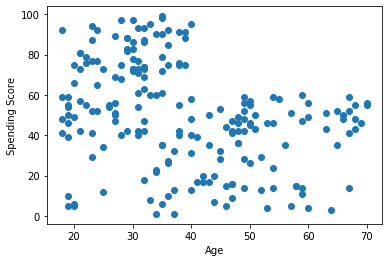

In [5]:
plt.scatter(mall["Age"],mall["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

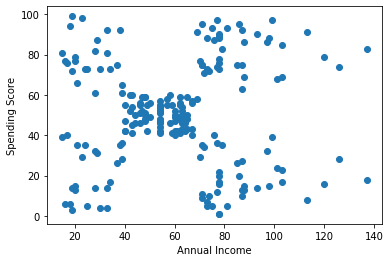

In [6]:
plt.scatter(mall["Annual Income (k$)"],mall["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [7]:
X=mall.iloc[:,[3,4]].values

In [8]:
from sklearn.cluster import KMeans

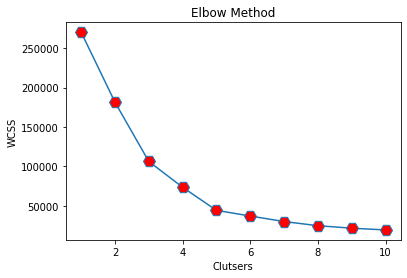

In [9]:
wcss=[]
clusters=np.arange(1,11)
for k in clusters:
    model=KMeans(n_clusters=k,random_state=0)
    model.fit(X)
    # inertia_=sum of squared distances of samples to their closest cluster center---> is error
    wcss.append(model.inertia_)
plt.plot(clusters,wcss,marker="H",markersize=12,markerfacecolor="red")# H= hexagon
plt.xlabel("Clutsers")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [10]:
model=KMeans(n_clusters=5,random_state=0)
#  fit_predict will take all rows here 
y_cluster=model.fit_predict(X)

In [11]:
y_cluster.shape

(200,)

In [12]:
y_cluster

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [14]:
y_cluster==0 # mask to check 1st cluster

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,

In [13]:
X.shape

(200, 2)

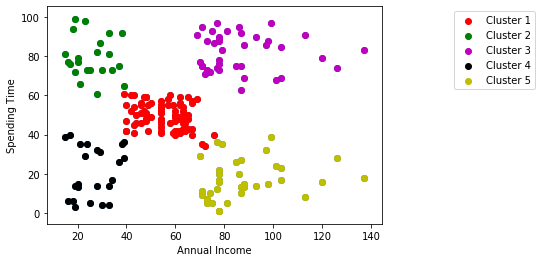

In [15]:
plt.scatter(X[:,0],X[:,1]);
plt.scatter(X[y_cluster==0,0],X[y_cluster==0,1],color='r',label="Cluster 1");
plt.scatter(X[y_cluster==1,0],X[y_cluster==1,1],color='g',label="Cluster 2");
plt.scatter(X[y_cluster==2,0],X[y_cluster==2,1],color='m',label="Cluster 3");
plt.scatter(X[y_cluster==3,0],X[y_cluster==3,1],color='k',label="Cluster 4");
plt.scatter(X[y_cluster==4,0],X[y_cluster==4,1],color='y',label="Cluster 5");
plt.xlabel("Annual Income")
plt.ylabel("Spending Time")
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [17]:
# where is the Centriods--->clusters centre cc
cc=model.cluster_centers_

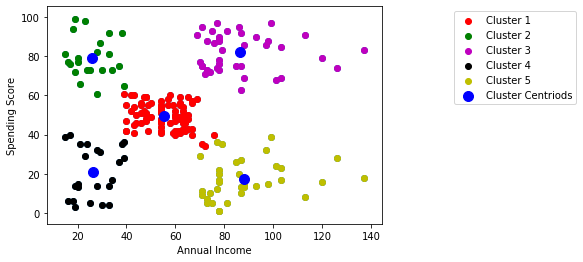

In [20]:
plt.scatter(X[:,0],X[:,1]);
plt.scatter(X[y_cluster==0,0],X[y_cluster==0,1],color='r',label="Cluster 1");
plt.scatter(X[y_cluster==1,0],X[y_cluster==1,1],color='g',label="Cluster 2");
plt.scatter(X[y_cluster==2,0],X[y_cluster==2,1],color='m',label="Cluster 3");
plt.scatter(X[y_cluster==3,0],X[y_cluster==3,1],color='k',label="Cluster 4");
plt.scatter(X[y_cluster==4,0],X[y_cluster==4,1],color='y',label="Cluster 5");
plt.scatter(cc[:,0],cc[:,1],color='b',label="Cluster Centriods",s=100);
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [34]:
model4=KMeans(n_clusters=4,random_state=0) # for 4 clusters
#  fit_predict will take all rows here 
y_cluster4=model4.fit_predict(X)

In [36]:
y_cluster4

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [42]:
# where is the Centriods--->clusters centre cc
cc4=model4.cluster_centers_
print(cc4)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [48.26       56.48      ]]


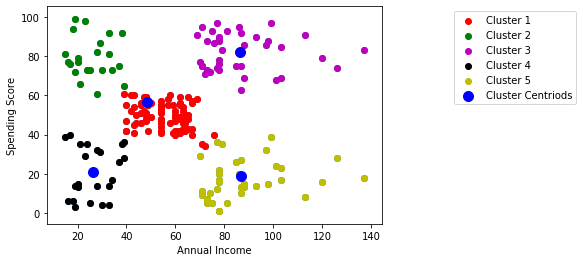

In [41]:
plt.scatter(X[:,0],X[:,1]);
plt.scatter(X[y_cluster==0,0],X[y_cluster==0,1],color='r',label="Cluster 1");
plt.scatter(X[y_cluster==1,0],X[y_cluster==1,1],color='g',label="Cluster 2");
plt.scatter(X[y_cluster==2,0],X[y_cluster==2,1],color='m',label="Cluster 3");
plt.scatter(X[y_cluster==3,0],X[y_cluster==3,1],color='k',label="Cluster 4");
plt.scatter(X[y_cluster==4,0],X[y_cluster==4,1],color='y',label="Cluster 5");
plt.scatter(cc4[:,0],cc4[:,1],color='b',label="Cluster Centriods",s=100);
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()